# Exploratory Data Analysis (EDA)

## 1. Introduction
- Purpose of EDA
- Key business questions

## 2. Dataset Overview
- Dataset size and structure
- Feature categories (customer, policy, vehicle)

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Visualization settings
plt.style.use("seaborn-v0_8")

In [51]:
import sys
print(sys.executable)
print(sys.version)

/usr/local/bin/python3.11
3.11.2 (v3.11.2:878ead1ac1, Feb  7 2023, 10:02:41) [Clang 13.0.0 (clang-1300.0.29.30)]


In [52]:
import sys
!{sys.executable} -m pip install seaborn


[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: pip3.11 install --upgrade pip


In [53]:
import seaborn as sns
print(sns.__version__)

0.13.2


In [54]:
import sys
print(sys.executable)
print(sys.version)

/usr/local/bin/python3.11
3.11.2 (v3.11.2:878ead1ac1, Feb  7 2023, 10:02:41) [Clang 13.0.0 (clang-1300.0.29.30)]


In [55]:
train_path = "../data/car_insurance_premium_training.csv"

df = pd.read_csv(train_path)

In [56]:
# Basic overview
df.shape

(32136, 40)

In [ ]:
# NOTE:
# df.head() is intentionally commented out to avoid exposing PII.
# Data inspection is performed using aggregated statistics only.
# df.head()

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32136 entries, 0 to 32135
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          32136 non-null  object 
 1   prefix                               21345 non-null  object 
 2   first_name                           32136 non-null  object 
 3   last_name                            32116 non-null  object 
 4   gender                               32136 non-null  object 
 5   birth_date                           32136 non-null  object 
 6   driving_license_date                 32136 non-null  object 
 7   phone_number                         32136 non-null  object 
 8   email                                32136 non-null  object 
 9   secondary_address                    32136 non-null  object 
 10  building_number                      32136 non-null  int64  
 11  street_name                 

In [59]:
df.describe()

,building_number,seniority,current_policies_held,max_policies_held,max_products_held,lapsed_policies,payment_method,net_premium_amount,total_claims_cost_in_current_year,total_claims_number_in_current_year,...,total_claims_number_ratio,policy_type,second_driver,matriculation_year,vehicle_horsepower,vehicle_cylinder,vehicle_value,vehicle_doors,vehicle_length,vehicle_weight
count,32136.000000,32136.000000,32136.000000,32136.000000,32136.000000,32136.000000,32136.000000,32136.000000,32136.000000,32136.000000,...,32136.000000,32136.000000,32136.000000,32136.000000,32136.000000,32136.000000,32136.000000,32136.000000,31451.000000,32136.000000
mean,185.629792,5.896596,1.443055,1.796023,1.048015,0.391804,0.361433,579.367438,104.826855,0.206622,...,0.463897,2.839806,0.119461,2004.573376,97.543409,1717.529842,18972.391870,4.404998,4.251559,1252.991349
std,280.506483,5.909002,0.943590,1.157598,0.231683,0.550027,0.480423,44.991023,1110.840111,0.771437,...,0.774516,0.396159,0.324335,5.347809,28.174377,409.694777,7176.732691,0.976780,0.378661,274.112493
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,460.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1954.000000,0.000000,49.000000,270.460000,0.000000,2.500000,55.000000
25%,6.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,542.000000,0.000000,0.000000,...,0.000000,3.000000,0.000000,2001.000000,75.000000,1461.000000,14093.730000,4.000000,4.015000,1089.000000
50%,45.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,575.000000,0.000000,0.000000,...,0.000000,3.000000,0.000000,2004.000000,95.000000,1749.000000,18020.000000,5.000000,4.227000,1239.000000
75%,255.000000,7.000000,2.000000,2.000000,1.000000,1.000000,1.000000,614.000000,0.000000,0.000000,...,0.660000,3.000000,0.000000,2007.000000,110.000000,1952.000000,22466.050000,5.000000,4.454000,1395.000000
max,999.000000,40.000000,17.000000,17.000000,4.000000,7.000000,1.000000,676.000000,128809.730000,15.000000,...,20.860000,3.000000,1.000000,2018.000000,340.000000,5654.000000,110000.000000,6.000000,8.218000,2725.000000


**Dataset Overview Summary**

- The dataset contains approximately 32136 records and 40 features.
- The target variable is `net_premium_amount`, representing the annual insurance premium.
- The dataset includes a mix of numerical, categorical, and date-related features related to customers, policies, and vehicles.

## 3. Target Variable Analysis
- Distribution of net_premium_amount
- Summary statistics and skewness

In [60]:
target = "net_premium_amount"

In [61]:
df[target].describe()

count    32136.000000
mean       579.367438
std         44.991023
min        460.000000
25%        542.000000
50%        575.000000
75%        614.000000
max        676.000000
Name: net_premium_amount, dtype: float64

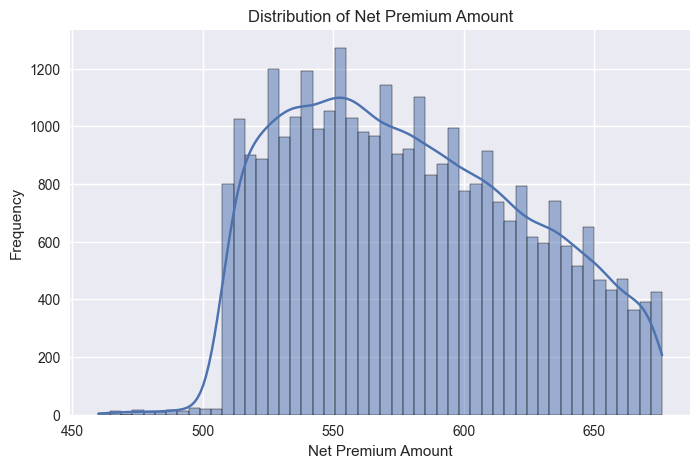

In [62]:
plt.figure(figsize=(8, 5))
sns.histplot(df[target], bins=50, kde=True)
plt.title("Distribution of Net Premium Amount")
plt.xlabel("Net Premium Amount")
plt.ylabel("Frequency")
plt.show()

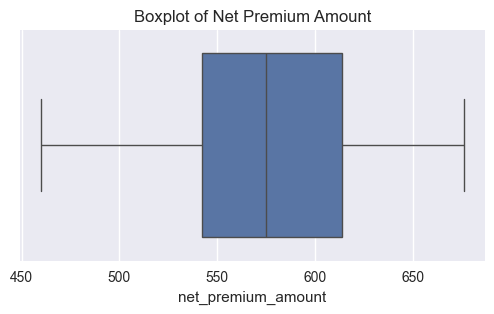

In [63]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=df[target])
plt.title("Boxplot of Net Premium Amount")
plt.show()

In [64]:
df[target].skew()

np.float64(0.2877961142027823)

****Target Variable Analysis Summary/Interpretation**

The target variable `net_premium_amount` shows a relatively stable and 
well-controlled distribution with a mild right skew (skewness ≈ 0.29). 
No extreme outliers are observed based on boxplot analysis.

The narrow range and limited variance of premium values support the use of 
MAE as the primary evaluation metric, as prediction errors can be directly 
interpreted in monetary terms. RMSE will be monitored as a secondary metric 
to account for potential high-cost mispricing cases.

Overall, the distribution suggests that linear regression-based models are 
a reasonable baseline for initial experimentation.

## 4. Data Quality Assessment
- Missing values
- Potential outliers
- Data consistency checks

## 5. Hypothesis-Driven Analysis

### 5.1 Vehicle-related Features vs Premium
- Vehicle value
- Vehicle age
- Engine-related features

### 5.2 Claims History vs Premium
- Number of claims
- Total claim cost
- Claim frequency ratio

## 6. Feature Selection Considerations
- Features to include
- Features to exclude
- Rationale for exclusion

## 7. EDA Summary and Next Steps
- Key findings
- Implications for data preparation
- Recommendations for modeling